<a href="https://colab.research.google.com/github/Felipe-Roque/Events_Analytics/blob/main/AnalisaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from sklearn.preprocessing import StandardScaler
from scipy import stats

from google.colab import drive 
drive.mount('/content/gdrive')
#df = pd.read_csv('dataset_ocorrencias.csv',sep=';',thousands=',')

df = pd.read_csv("gdrive/MyDrive/dataset_ocorrencias.csv",sep=';')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# id_ocorrencia - identificação única da ocorrência

# cidade	- A cidade onde aconteceu a ocorrência

# população - Pupulação da cidade

# horario	- horario da ocorrencia com data e hora

# vtr - viatura empenhanha na ocorrencia

# mtcl - matricula do militar ou cpf do Bombeiro comunitario

# militar_bc - identificação se o individuo é Bombeiro Comunitário ou Bombeiro Militar

# bc_indenizado - Identifica se o Bombeiro Comunitario estava no serviço sendo pago(indenizado) ou não
	
# obm - Organização Bombeiro Militar que estava na ocorrência

# coordenada_obm - Coordenada da organização Bombeiro Militar

# coordenada_ocorrencia - Coordenada da Ocorrência

# lat_ocorrencia - Latitude ocorrência

# lon_ocorrencia - Longitude Ocorrência

# tipo - Tipo da ocorrência, pode ser Atendimento pré-hospitalar - APH, incendio, acidente e outros.

# subtipo - especifica o tipo, num APH, pode especificar desmaio, nem sempre é preenchido. 

# tempo_resposta - Tempo do acionamento até a chegada ao local da ocorrêcia, pode ser um dado que estaja bem falho, pois acontece do bombeiro esquecer de clicar no botão 

# tempo_total_empenho - tempo total da saída da obm até a chegada a obm novamente. 

# firecast - indica se uma viatura utilizou o sistema "firecast" para dar J-9, J-10, J-11 e J-12 nos deslocamentos
 
# origem_samu - Se foi um repasse da ocorrência que era do samu

# vitima - geração no sistema, talvez de pra gerar o número de vítimas, nome, idade, alguns sinais vitais.





In [ ]:
df.dropna(axis=0,how='any',subset=['lat_ocorrencia','lon_ocorrencia'],inplace=True)

Data = df[["id_ocorrencia", "cidade","horario", "lat_ocorrencia","lon_ocorrencia"]]



Flori =  Data.loc[Data['cidade'] == 'Florianópolis']

X = Flori.drop_duplicates(subset ="id_ocorrencia",keep='first')


#X.to_csv("gdrive/MyDrive/DataFlorianopolis.csv", index=False, encoding='utf-8-sig')

print(X.shape)
# TODO: descobrir como normalizar dados de GPS com diferentes precisões
Y= X[["lon_ocorrencia", "lat_ocorrencia"]]

# Y.lon_ocorrencia = Y.lon_ocorrencia .str.replace(',', '').astype(float).astype(int)
# Y.lat_ocorrencia = Y.lat_ocorrencia .str.replace(',', '').astype(float).astype(int)

Y

(15527, 5)


,lon_ocorrencia,lat_ocorrencia
107,-48.416753,-27.479527
278,-48.422710,-27.442965
279,-48.553691,-27.597483
287,-48.420054,-27.495276
290,-48.553353,-27.589007
303,-48.577404,-27.590088
311,-48.462447,-27.604817
530,-48.512479,-27.570686
532,-48.453377,-27.608350
537,-48.498259,-27.560490


1    7787
3    2953
0    2860
2    1436
Name: cluster, dtype: int64


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


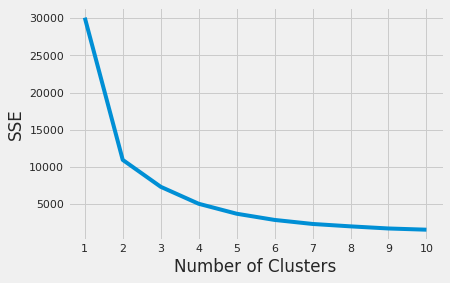

In [ ]:

scaler = StandardScaler()
Y = Y.loc[Y["lon_ocorrencia"] >= -48.6,:]

scaled_features = scaler.fit_transform(Y)
sse = []
models = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    models.append(kmeans)

Y["cluster"] = models[3].predict(scaled_features)
print(Y["cluster"].value_counts())

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


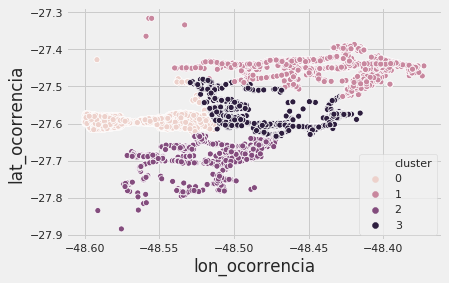

In [ ]:
#TODO: testar GeoPandas https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

sns.scatterplot(x='lon_ocorrencia',
                      y='lat_ocorrencia',
                      hue='cluster', data = Y)
plt.show()

A area que esta plotada nesse grafico eh maior que florianopolis, pegando a parte continuental, limitei na latitude em florianopolis nos outros experimentos

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from google.colab import drive 
drive.mount('/content/gdrive')

print(__doc__)


df = pd.read_csv("gdrive/MyDrive/dataset_ocorrencias.csv",sep=';')

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
df.dropna(axis=0,how='any',subset=['lat_ocorrencia','lon_ocorrencia'],inplace=True)

Data = df[["id_ocorrencia", "cidade","horario", "lat_ocorrencia","lon_ocorrencia","tipo"]]



Flori =  Data.loc[Data['cidade'] == 'Araranguá']
Flori =  Flori.loc[Flori['tipo'] == 'ATENDIMENTO PRÉ-HOSPITALAR']


F_drop = Flori.drop_duplicates(subset ="id_ocorrencia",keep='first')


# TODO: descobrir como normalizar dados de GPS com diferentes precisões
mask = (F_drop["lon_ocorrencia"] >= -50.0) & (F_drop["lon_ocorrencia"] <= -49.2) & (F_drop["lat_ocorrencia"] <= -28.75)#Araranguá
Y = F_drop.loc[mask]

#Y = F_drop.loc[F_drop["lon_ocorrencia"] >= -48.6,:] florianopolis
#Y1 = F_drop.loc[F_drop["lon_ocorrencia"] >= -50.0,:]
#Y = Y1.loc[Y1["lon_ocorrencia"] <= -49.2,:]


X = (Y[["lon_ocorrencia", "lat_ocorrencia"]]).values
print(Y)
# Y.lon_ocorrencia = Y.lon_ocorrencia .str.replace(',', '').astype(float).astype(int)
# Y.lat_ocorrencia = Y.lat_ocorrencia .str.replace(',', '').astype(float).astype(int)





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Automatically created module for IPython interactive environment
         id_ocorrencia     cidade              horario  lat_ocorrencia  \
73            40047441  Araranguá  12/07/2017 18:09:00      -28.945636   
86            40048509  Araranguá  08/08/2017 08:55:00      -28.933472   
147           40047149  Araranguá  05/07/2017 10:59:00      -28.948445   
151           40045658  Araranguá  26/05/2017 17:07:00      -28.945481   
480           40045744  Araranguá  29/05/2017 10:20:00      -28.945579   
481           40047342  Araranguá  10/07/2017 10:03:00      -28.936634   
496           40048320  Araranguá  02/08/2017 11:22:00      -28.934941   
499           40047617  Araranguá  17/07/2017 08:46:00      -28.934913   
815           40045108  Araranguá  11/05/2017 01:24:00      -28.946559   
818           40045091  Araranguá  10/05/2017 15:09:00      -28.

('For n_clusters =', 2, 'The average silhouette_score is :', 0.576316064357464)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.6289623883531541)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.48773406224275717)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.41891226522651115)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.4070489486986463)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.40637653894444925)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.41283849028095915)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.4272669048233489)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.43491347982926915)
('For n_clusters =', 11, 'The average silhouette_score is :', 0.4363194945566194)
('For n_clusters =', 12, 'The average silhouette_score is :', 0.4273450778080334)
('For n_clusters =', 13, 'The average silhouette_score is :', 0.42573600539115164)
('For n_clusters ='

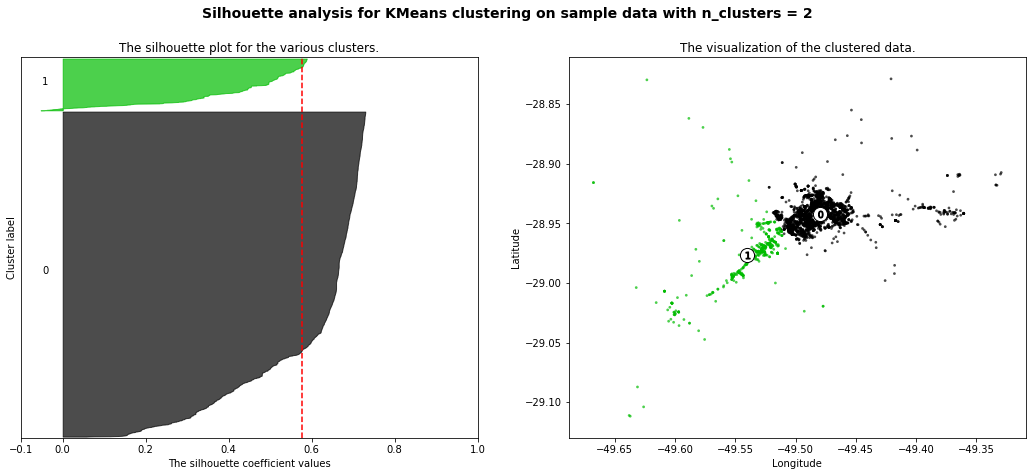

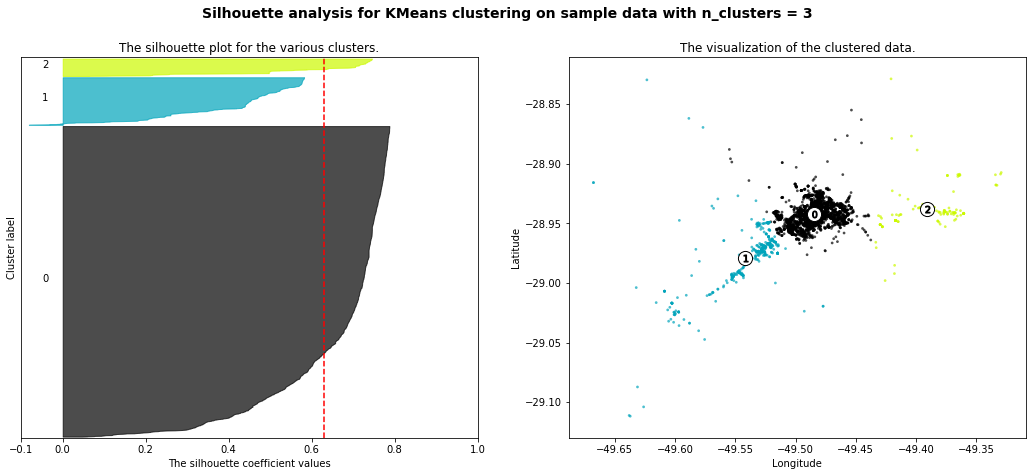

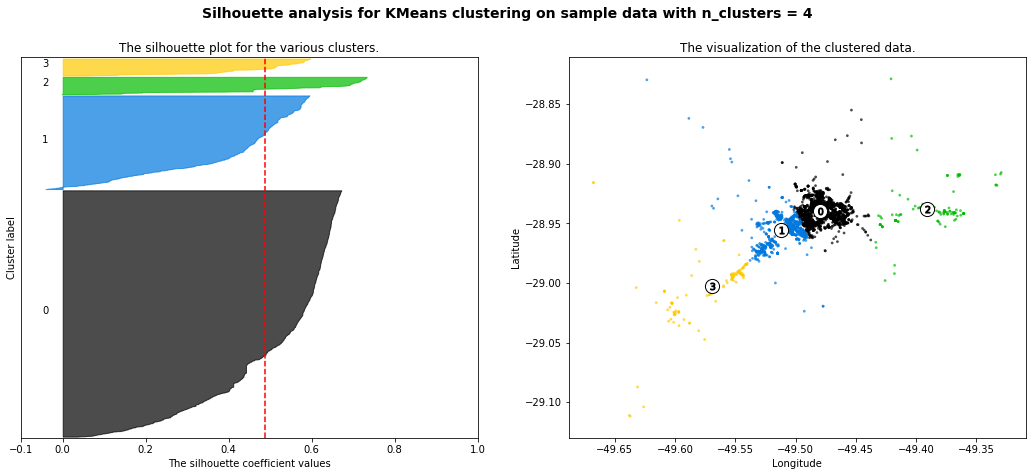

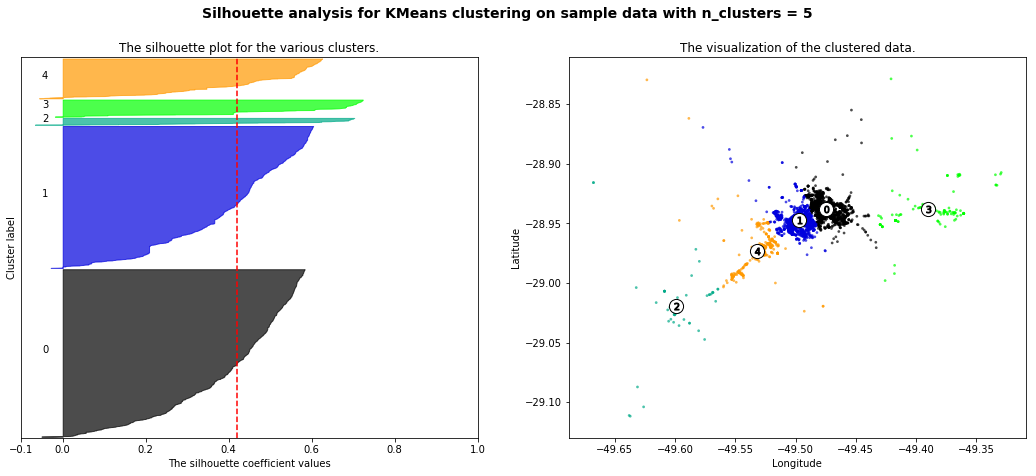

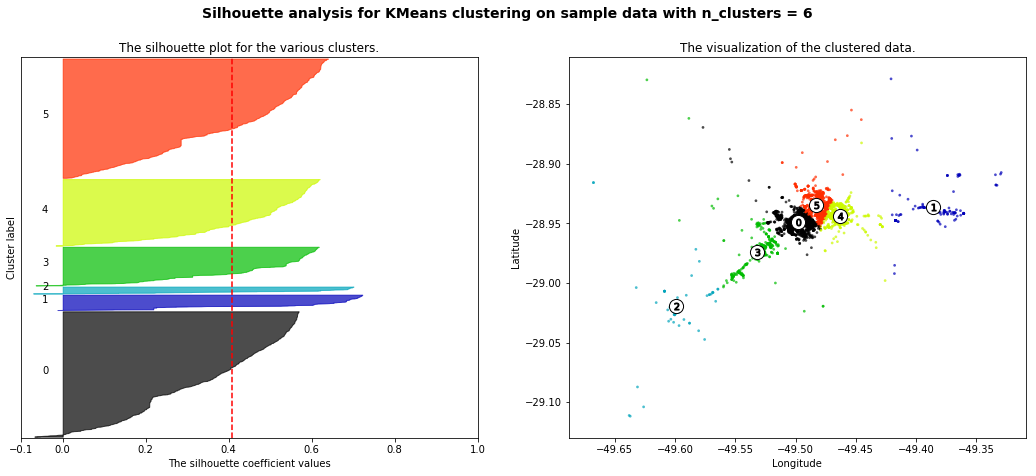

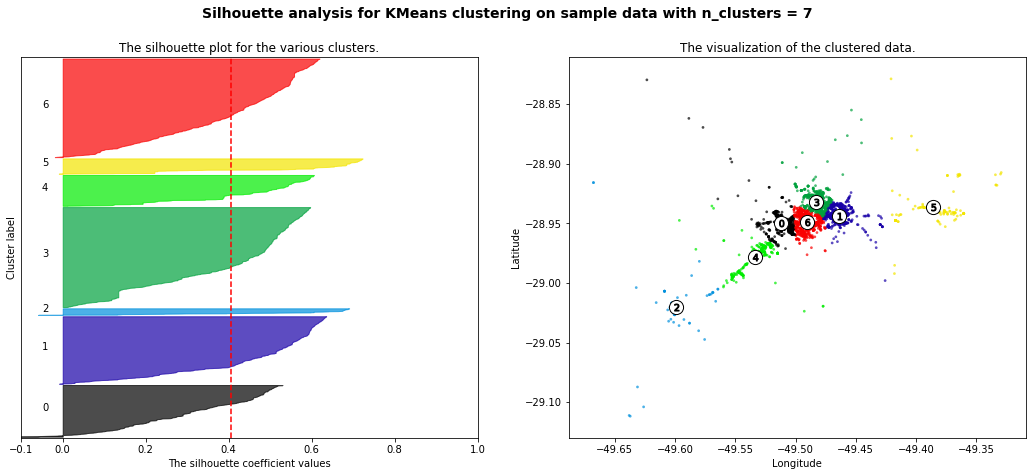

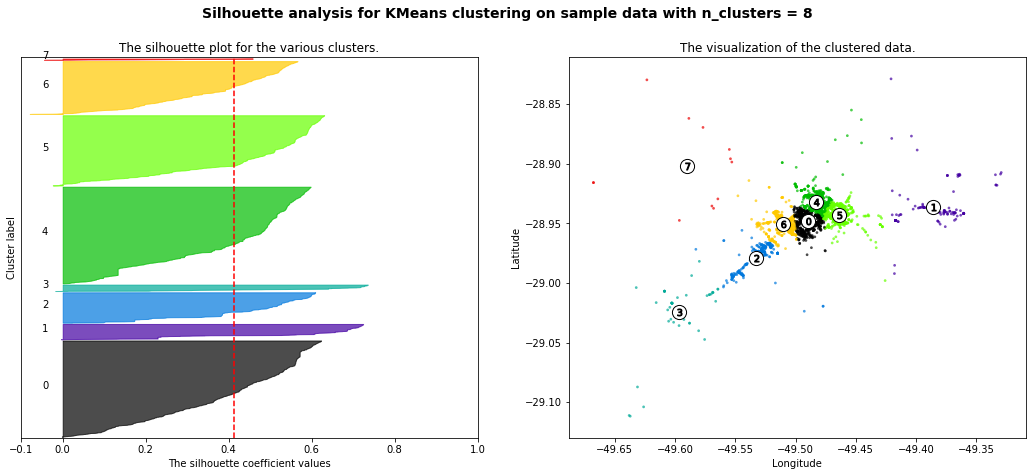

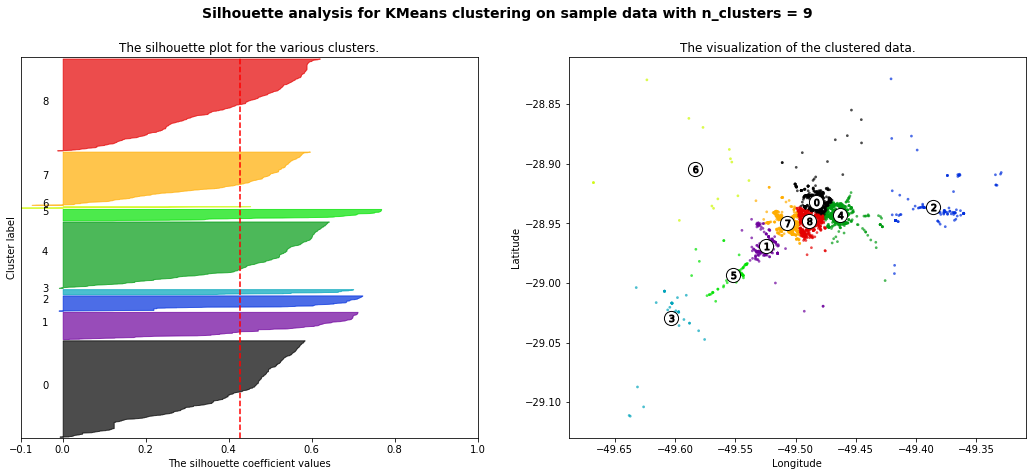

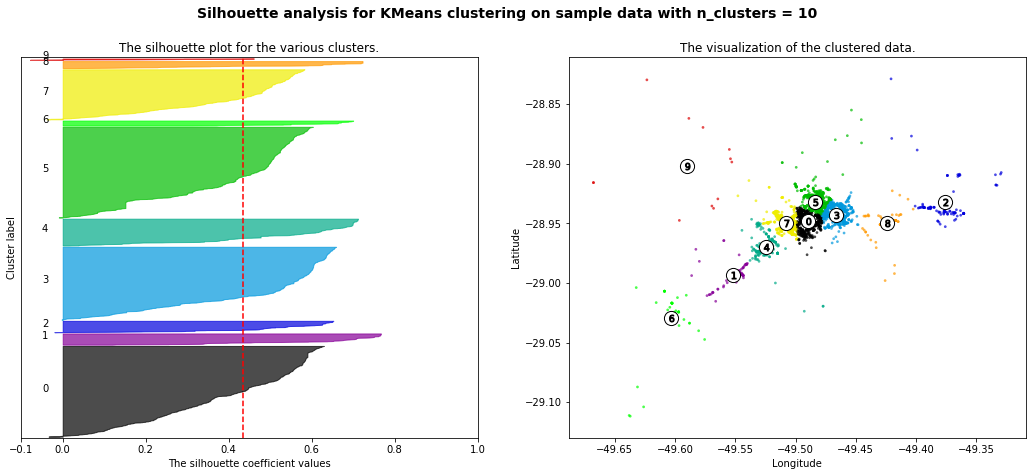

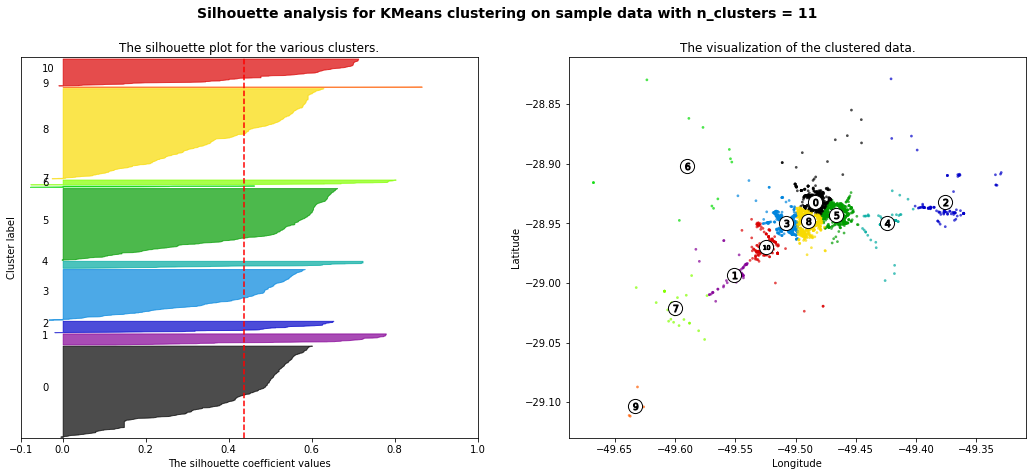

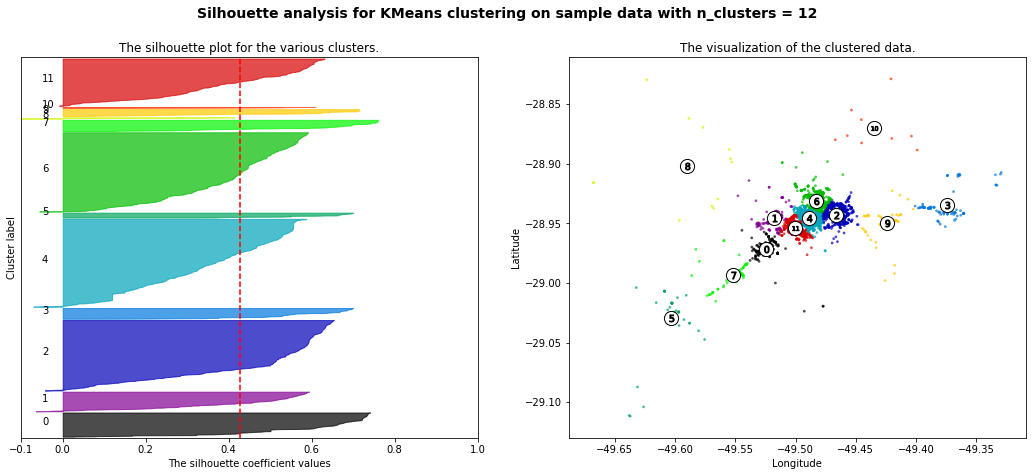

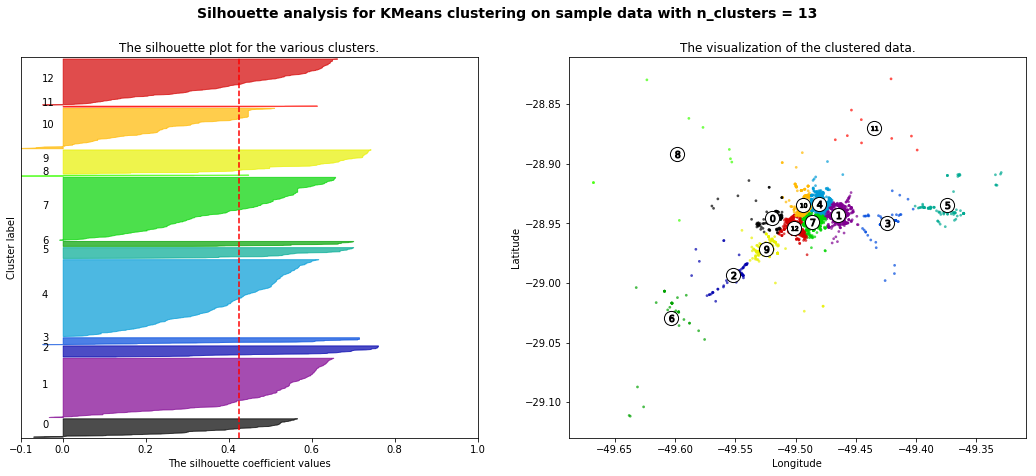

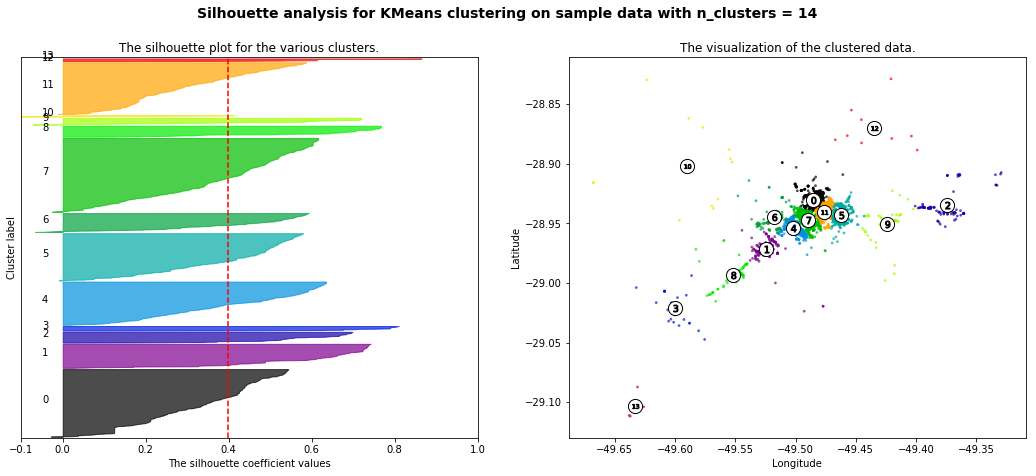

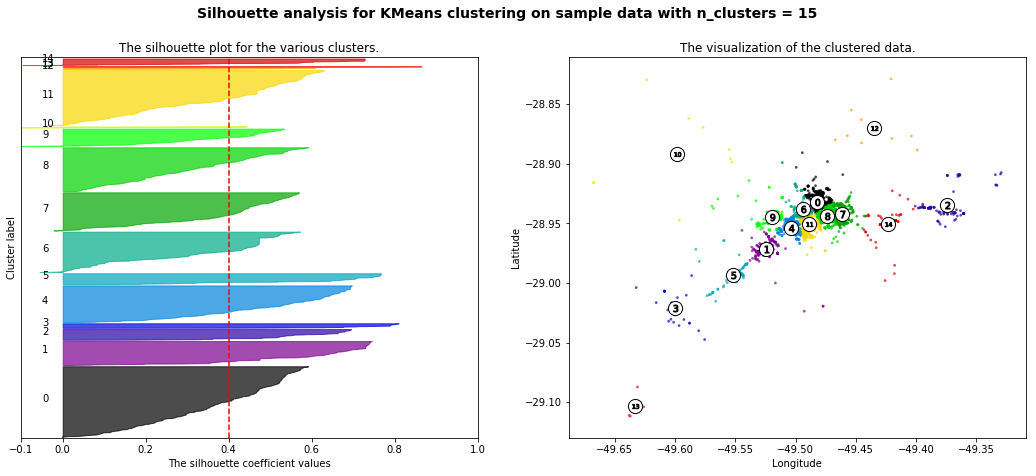

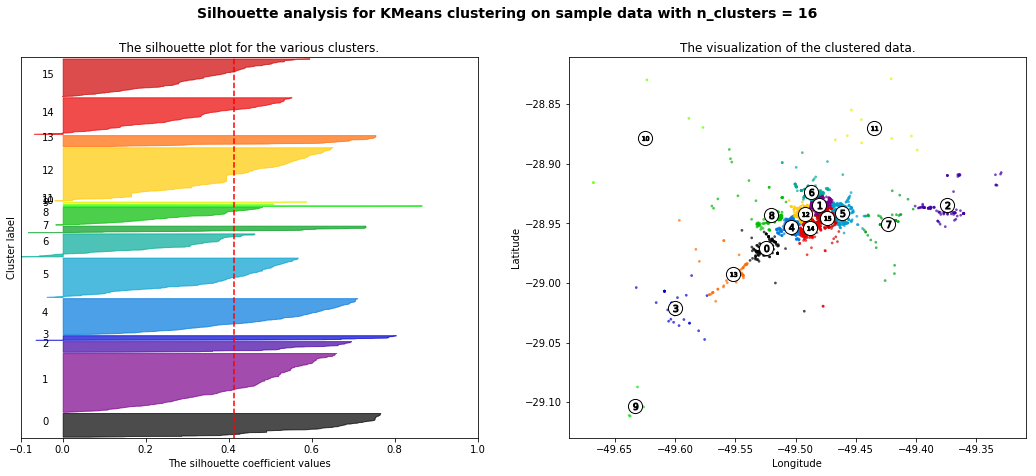

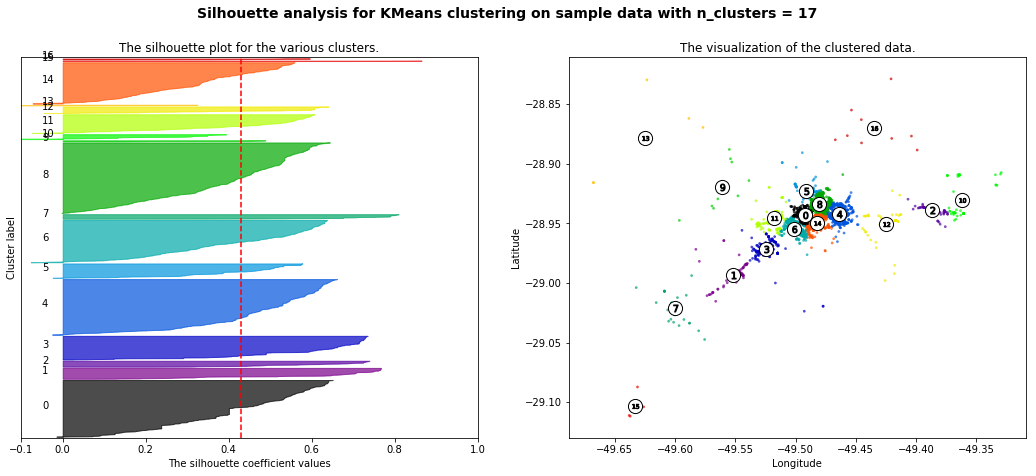

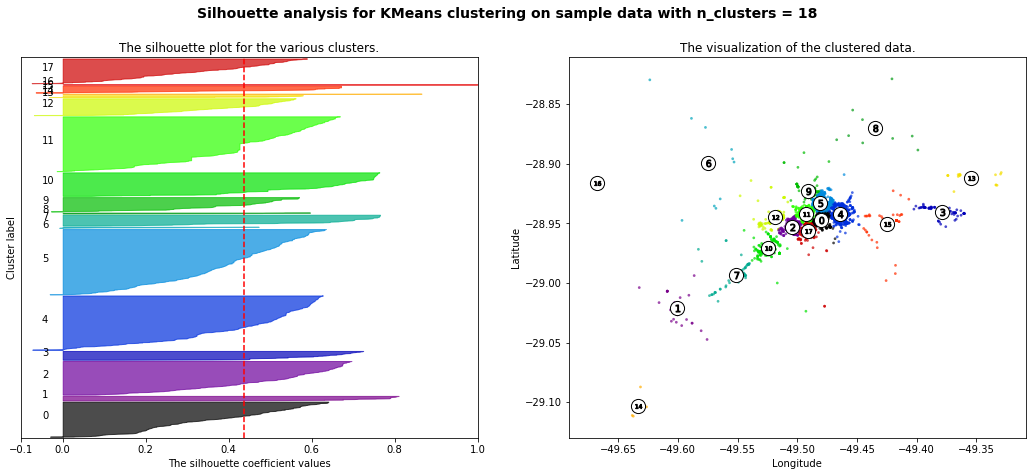

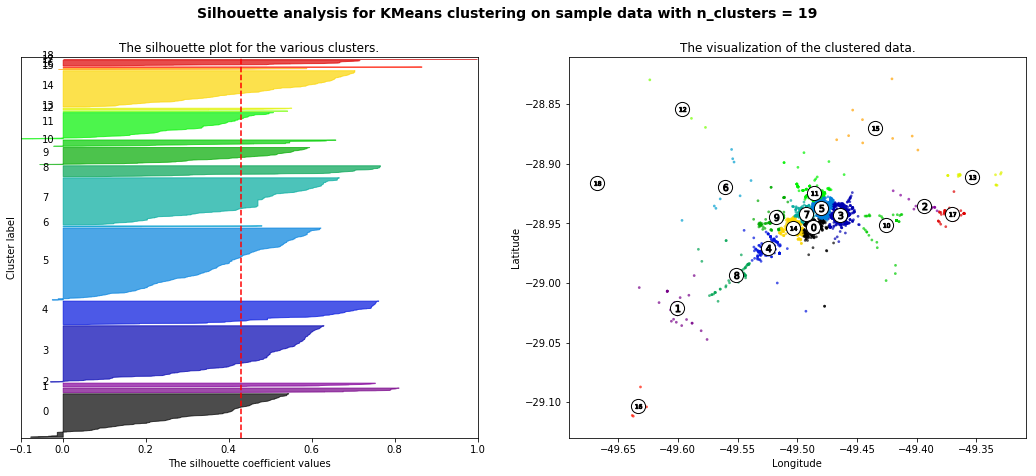

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Longitude")
    ax2.set_ylabel("Latitude")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [ ]:
#df.groupby(['horario']).horario.count()
#count = Data.groupby(Data['horario'].dt.horario).size()
#count
s = pd.to_datetime(Flori["horario"])

Flori = s.groupby(s.dt.floor('d')).size().reset_index(name='count')
print (Flori)




       horario  count
0   2017-01-01      4
1   2017-01-02     12
2   2017-01-03      6
3   2017-01-04      7
4   2017-01-05     12
5   2017-01-07     14
6   2017-01-08      6
7   2017-01-09     18
8   2017-01-10      8
9   2017-01-11      5
10  2017-01-12     16
11  2017-01-13      3
12  2017-01-14      3
13  2017-01-15      4
14  2017-01-16      4
15  2017-01-17      4
16  2017-01-18     11
17  2017-01-19      6
18  2017-01-20      8
19  2017-01-21     12
20  2017-01-22      6
21  2017-01-23      4
22  2017-01-25     27
23  2017-01-26      8
24  2017-01-27     16
25  2017-01-28      6
26  2017-01-29     16
27  2017-01-30     10
28  2017-01-31      9
29  2017-02-01      8
..         ...    ...
898 2020-12-18      9
899 2020-12-19     21
900 2020-12-20     14
901 2020-12-21     11
902 2020-12-22     16
903 2020-12-23      7
904 2020-12-24      6
905 2020-12-25      3
906 2020-12-26      8
907 2020-12-27      9
908 2020-12-28     20
909 2020-12-30     18
910 2020-12-31      9
911 2021-0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

from google.colab import drive 
drive.mount('/content/gdrive')
#df = pd.read_csv('dataset_ocorrencias.csv',sep=';',thousands=',')

df = pd.read_csv("gdrive/MyDrive/dataset_ocorrencias.csv",sep=';')

df.dropna(axis=0,how='any',subset=['lat_ocorrencia','lon_ocorrencia'],inplace=True)

# Variable with the Longitude and Latitude
X=df.loc[:,['id_ocorrencia','cidade','horario','lat_ocorrencia','lon_ocorrencia']]



X =  X.loc[X['cidade'] == 'Florianópolis']

X = X.drop_duplicates(subset ="id_ocorrencia",keep='first')

kmeans = KMeans(n_clusters = 14, init ='k-means++')
kmeans.fit(X[X.columns[3:5]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[3:5]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[3:5]]) # Labels of each point
X





Mounted at /content/gdrive


/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id_ocorrencia,cidade,horario,lat_ocorrencia,lon_ocorrencia,cluster_label
107,10065490,Florianópolis,20/01/2017 20:03:00,-27.479527,-48.416753,5
278,10075324,Florianópolis,03/07/2017 14:27:00,-27.442965,-48.422710,0
279,10073843,Florianópolis,05/06/2017 15:02:00,-27.597483,-48.553691,11
287,10077079,Florianópolis,02/08/2017 22:58:00,-27.495276,-48.420054,5
290,10065232,Florianópolis,17/01/2017 09:39:00,-27.589007,-48.553353,11
303,10065366,Florianópolis,19/01/2017 08:25:00,-27.590088,-48.577404,1
311,10065619,Florianópolis,22/01/2017 17:02:00,-27.604817,-48.462447,12
530,10067124,Florianópolis,14/02/2017 12:44:00,-27.570686,-48.512479,6
532,10081166,Florianópolis,23/10/2017 17:34:00,-27.608350,-48.453377,12
537,10084447,Florianópolis,14/12/2017 22:02:00,-27.560490,-48.498259,13


In [ ]:




Data = pd.DataFrame()
#print(Data)


#criar coluna X_dia
X["data_dia"] = pd.to_datetime(X["horario"]).dt.floor('d')
X['cluster_label'] = X['cluster_label'].astype('category')
v = X.groupby(['data_dia', 'cluster_label']).size().unstack(fill_value=0)
print(v)
#print(X.groupby('data_dia').sum())
"""for i in range(0, 13):
   # Xinput = X.loc[X["cluster_label"] == i,:]
   
    #s = pd.to_datetime(Xinput["horario"])
 
    #time = s.dt.floor('d')
    #print(time)
    break
    cluster1 = s.groupby(s.dt.floor('d')).size().reset_index(name='count')
    #print(cluster1)
    col_name = 'cluster' + str(i)
    Data[col_name] = cluster1['count']
     """

#https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
#Xinput

#Data





#cluster1['count']    #pega somente a contagem


cluster_label  0   1   2   3   4   5   6   7   8   9   10  11  12  13
data_dia                                                             
2017-01-01      4   2   0   0   1   3   2   2   0   3   0   6   3   1
2017-01-02      2   2   0   0   0   0   1   1   0   2   0   3   1   3
2017-01-03      1   5   0   0   0   2   1   1   0   0   0   5   0   0
2017-01-04      3   5   0   0   0   1   3   1   0   1   0   3   1   1
2017-01-05      0   3   0   0   3   0   1   3   0   0   0   2   1   0
2017-01-06      2   2   0   0   2   0   3   0   0   1   0   4   1   0
2017-01-07      0   4   0   0   1   2   4   2   0   0   0   6   3   2
2017-01-08      1   5   0   0   1   1   3   1   0   0   0   4   2   0
2017-01-09      3   3   0   0   0   1   3   0   0   0   0   8   2   0
2017-01-10      1   2   0   0   0   0   3   1   0   0   0   7   0   0
2017-01-11      2   3   0   0   0   1   4   4   0   1   0   3   2   1
2017-01-12      1   5   0   0   0   1   7   1   0   0   0   7   1   0
2017-01-13      3   

'for i in range(0, 13):\n   # Xinput = X.loc[X["cluster_label"] == i,:]\n   \n    #s = pd.to_datetime(Xinput["horario"])\n \n    #time = s.dt.floor(\'d\')\n    #print(time)\n    break\n    cluster1 = s.groupby(s.dt.floor(\'d\')).size().reset_index(name=\'count\')\n    #print(cluster1)\n    col_name = \'cluster\' + str(i)\n    Data[col_name] = cluster1[\'count\']\n     '

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54688 entries, 0 to 54687
Data columns (total 23 columns):
Unnamed: 0               54688 non-null int64
id_ocorrencia            54688 non-null int64
cidade                   54688 non-null object
populacao                54688 non-null int64
horario                  54688 non-null object
vtr                      54688 non-null object
mtcl                     54579 non-null float64
militar_bc               54436 non-null object
bc_indenizado            54579 non-null object
obm                      54579 non-null object
coordenada_obm           54579 non-null object
lat_obm                  45090 non-null float64
lon_obm                  54579 non-null object
coordenada_ocorrencia    54688 non-null object
lat_ocorrencia           54688 non-null float64
lon_ocorrencia           54688 non-null float64
tipo   

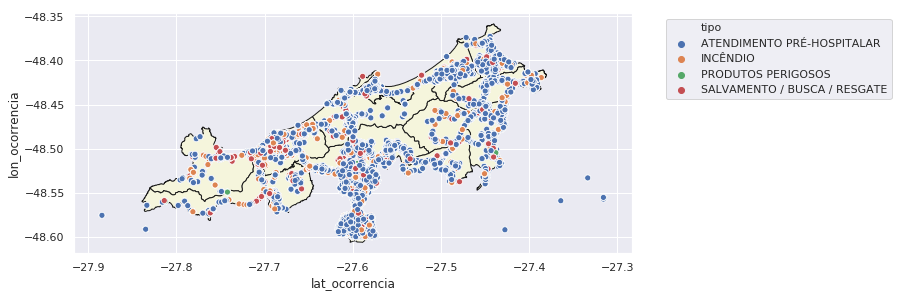

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from sklearn.preprocessing import StandardScaler
from scipy import stats
import geopandas as gpd

from google.colab import drive 
drive.mount('/content/gdrive')
#df = pd.read_csv('dataset_ocorrencias.csv',sep=';',thousands=',')
df = pd.read_csv("./dados_florianopolis.csv", encoding='utf-8', sep=';')
df.info()
#print(df)

floripa_data = gpd.read_file('gdrive/MyDrive/distritos_adm.shp')
floripa_data.info()

# a projecao dos dados do arquivo .shp eh Mercator. Precisamos converter para 4326
floripa_data = floripa_data.to_crs("EPSG:4326")


fig, base = plt.subplots(figsize=(10, 6))
base.set_aspect('equal')

# plot do mapa
floripa_data.plot(ax = base, color = 'beige', edgecolor = 'k', zorder  =1)

# overlay das ocorrencias sobre o mapa
sns.scatterplot(x = "lat_ocorrencia", y = "lon_ocorrencia", marker = 'o', ax = base, hue = 'tipo', data = df)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

from google.colab import drive 
drive.mount('/content/gdrive')
#df = pd.read_csv('dataset_ocorrencias.csv',sep=';',thousands=',')

df = pd.read_csv("gdrive/MyDrive/dataset_ocorrencias.csv",sep=';')
df = df.loc[df['cidade'] == 'Florianópolis']
df = df.loc[df["lon_ocorrencia"] >= -48.6]
df.to_csv('dados_florianopolis.csv', encoding="utf-8", sep=';')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
